# **Actividad 3.6** – Rendimiento deportivo:

## Descripción de la actividad:

El objeto de este proyecto es resolver un problema de regresión o de clasificación utilizando como origen de datos los datos obtenidos de un reloj deportivo durante los entrenamientos y competiciones realizadas.

El fichero con los datos está adjunto a la actividad y se denomina: `Activities.csv`

El dataset utilizado permitirá resolver un problema de regresión o de clasificación, ha de ser de tu elección y propuesto al profesor.

Para el problema de regresión se ha de predecir el número de **Calorías** y para el problema de clasificación la columna a predecir será la denominada **Esfuerzo**.

Las columnas acordadas por los alumnos y con las que trabajaremos son:

- Tipo de actividad
- **Calorías**
- Distancia
- Tiempo
- Frecuencia cardiaca media
- TE aeróbico
- Cadencia de carrera media
- Ritmo medio
- Ascenso total
- Descenso total
- Longitud media de zancada
- Temperatura mínima
- Temperatura máxima
- Altura mínima
- Altura máxima

---

Añadiremos una columna nueva titulada **Esfuerzo** y la informaremos según la siguiente tabla.

|Nombre       |Intervalo   |
|:-----------:|:----------:|
|Calentamiento|De 113 a 138|
|Suave        |De 139 a 154|
|Aeróbico     |De 155 a 164|
|Umbral       |De 165 a 173|
|Máximo       |Mayor de 173|

En el proyecto se han de incluir los siguientes apartados:

1. **(0,5 Puntos)** Explicación del problema y del dataset a utilizar. **Recuerda realizar una explicación detallada de cada característica**.

2. **(0,5 Puntos)** Importación del dataset.

3. **(1 Punto)** Revisar los datos y considerar el aplicar escalamiento de datos, conversión de variables categóricas a numéricas, revisar si hay valores erróneos o null o NaN, e indicar qué has decido hacer con ellos.

4. **(1 Punto)** Realizar una selección de aquellas características que consideres mejores para el entrenamiento del modelo. Indicar las herramientas (matriz de correlación, pairplot, etc…) utilizada para seleccionar las variables/características y argumentar los criterios/el criterio en las selección de las variables y características.

5. **(1,5 Puntos)** Realizar las pruebas oportunas para elegir aquel modelo que consideres adecuado en la resolución del problema. Recoger en la memoria los parámetros utilizados y el criterio de calidad (por ejemplo la precisión, MAE, etc…) que has decido utilizar para escoger un modelo. **Es fundamental/obligado el aplicar la técnica de la validación cruzada (Cross validation)**.

  Recuerda que para KNN hay que realizar una prueba con múltiples números de vecinos y el weight a utilizar, para dterminar los parámetros que ofrecen un mejor resultado.

6. Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:

  - **(0,75 Puntos)** Entrenarlo y obtener la matriz de confusión.

  - **(0,75 Puntos)** Exportar a un fichero los parámetros del modelo entrenado.

  - **(0,75 Puntos)** Importar los parámetros del modelo.

  - **(0,75 Puntos)** Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión.

7. **(1,5 Punto)** Montar una pequeña aplicación web con un servicio API donde se importará el modelo entrenado y que permitirá validar al usuario final la validez del modelo propuesto.

  **En aquellos campos que lo requieran se valorará el ofrecer en la interfaz un combo con posibles valores con el objeto de mejorar la usabilidad de la aplicación.**

8. **(1 Punto)** Indicar si es posible utilizar ChatGPT para la resolución del problema y obtención del modelo.

## 1. Explicación del problema y del dataset a utilizar. **Recuerda realizar una explicación detallada de cada característica**.

Este proyecto trata de resolver un **problema de regresión** a través de un conjunto de datos obtenido a partir de un reloj deportivo. El dataset se encuentra en un archivo csv llamado `Activities.csv`, e incluye columnas con información relevante sobre las actividades deportivas realizadas.

**El objetivo es predecir el número de Calorías** quemadas durante una actividad deportiva en función de las siguientes características:

- Tipo de actividad: Identifica y clasifica las distintas actividades deportivas realizadas, incluyendo 'Carrera' y 'Trail running'.

- Calorías: Representa la cantidad de calorías quemadas durante la actividad deportiva.

- Distancia: Registra la extensión geográfica cubierta en kilómetros durante la actividad.

- Tiempo: Registra la duración total de la actividad deportiva, desde su inicio hasta su finalización.

- Frecuencia cardiaca media: Ritmo promedio del latido cardíaco durante la actividad deportiva.

- TE aeróbico: Indicador que mide el efecto de un entrenamiento en la mejora de la capacidad aeróbica.

- Cadencia de carrera media: Número promedio por minuto de pasos realizados durante la actividad deportiva.

- Ritmo medio: Ritmo promedio mantenido durante la actividad.

- Ascenso total: Registra la cantidad total de terreno subido durante la actividad deportiva.

- Descenso total: Registra la cantidad total de terreno descendido durante la actividad deportiva.

- Longitud media de zancada: Distancia promedio entre dos pasos consecutivos durante la actividad.

- Temperatura mínima: Registra la temperatura más baja alcanzada en grados Celsius durante la actividad deportiva.

- Temperatura máxima: Registra la temperatura más alta alcanzada en grados Celsius durante la actividad deportiva.

- Altura mínima: Registra la altura más baja alcanzada en metros sobre el nivel del mar durante la actividad deportiva.

- Altura máxima: Registra la altura más alta alcanzada en metros sobre el nivel del mar durante la actividad deportiva.

## 2. Importación del dataset

In [1]:
# Importación de librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.externals
from sklearn import neighbors
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
import joblib

In [2]:
# Importación de los datos

df = pd.read_csv('Activities.csv', sep=";")

In [3]:
# Dataframe inicial a utilizar

df

,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,Frecuencia cardiaca máxima,TE aeróbico,...,Temperatura mínima,Intervalo en superficie,Descompresión,Mejor tiempo de vuelta,Número de vueltas,Temperatura máxima,Tiempo en movimiento,Tiempo transcurrido,Altura mínima,Altura máxima
0,Trail running,14/01/2023 8:21,False,Santa Brígida Trail running,21.48,"1,802",2:40:36,147,172,3.2,...,19.0,0:00,No,02:40:35.89.9,1,26.0,2:37:14,2:47:06,372,837.0
1,Carrera,10/01/2023 8:36,False,Santa Brígida - Series 20x12x15,8.46,673,0:47:09,156,178,3.3,...,20.0,0:00,No,00:08.55.3,15,28.0,0:47:05,0:48:18,474,522.0
2,Trail running,09/01/2023 8:20,False,Santa Brígida Trail running,11.11,"1,044",1:08:56,160,188,4.0,...,19.0,0:00,No,01:08:55.66,1,28.0,1:08:43,1:08:56,366,553.0
3,Trail running,07/01/2023 16:59,False,Santa Brígida Trail running,8.02,810,1:03:47,149,175,3.1,...,20.0,0:00,No,01:03:46.71.1,1,27.0,1:02:40,1:03:47,544,790.0
4,Trail running,04/01/2023 16:54,False,Santa Brígida Trail running,12.08,"1,007",1:28:49,144,158,2.6,...,20.0,0:00,No,01:28:49.19.4,1,26.0,1:28:17,1:28:49,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,21/01/2021 17:20,False,Santa Brígida Carrera,5.01,417,0:27:44,162,179,3.5,...,23.0,0:00,No,00:01.42.4,6,26.0,0:27:36,0:28:11,518,568.0
154,Carrera,19/01/2021 19:24,False,Santa Brígida Carrera,6.30,487,0:38:16,148,181,2.8,...,20.0,0:00,No,02:23.78.1,7,25.0,0:38:13,0:39:51,523,628.0
155,Carrera,13/01/2021 19:28,False,Santa Brígida Carrera,5.01,364,0:27:06,151,167,3.1,...,19.0,0:00,No,00:01.59.5,6,26.0,0:27:00,0:27:06,517,567.0
156,Carrera,11/01/2021 19:29,False,Santa Brígida Carrera,10.01,825,0:58:45,160,183,3.8,...,19.0,0:00,No,00:02.26.6,11,25.0,0:58:37,0:58:45,520,623.0


In [4]:
# Nombres de las columnas del Dataframe

df.columns

Index(['Tipo de actividad', 'Fecha', 'Favorito', 'Título', 'Distancia',
       'Calorías', 'Tiempo', 'Frecuencia cardiaca media',
       'Frecuencia cardiaca máxima', 'TE aeróbico',
       'Cadencia de carrera media', 'Cadencia de carrera máxima',
       'Ritmo medio', 'Ritmo óptimo', 'Ascenso total', 'Descenso total',
       'Longitud media de zancada', 'Relación vertical media',
       'Oscilación vertical media', 'Tiempo medio de contacto con el suelo',
       'Cadencia de carrera media.1', 'Cadencia de carrera máxima.1',
       'Training Stress Score®', 'Potencia media', 'Potencia máxima',
       'Dificultad', 'Fluidez', 'Swolf medio', 'Velocidad media de palada',
       'Repeticiones totales', 'Tiempo de inmersión', 'Temperatura mínima',
       'Intervalo en superficie', 'Descompresión', 'Mejor tiempo de vuelta',
       'Número de vueltas', 'Temperatura máxima', 'Tiempo en movimiento',
       'Tiempo transcurrido', 'Altura mínima', 'Altura máxima'],
      dtype='object')

Esta información puede ser útil cuando se desea realizar operaciones en una o más columnas específicas en el DataFrame.

In [5]:
# Información resumida sobre el Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tipo de actividad                      158 non-null    object 
 1   Fecha                                  158 non-null    object 
 2   Favorito                               158 non-null    bool   
 3   Título                                 158 non-null    object 
 4   Distancia                              158 non-null    float64
 5   Calorías                               158 non-null    object 
 6   Tiempo                                 158 non-null    object 
 7   Frecuencia cardiaca media              158 non-null    int64  
 8   Frecuencia cardiaca máxima             158 non-null    int64  
 9   TE aeróbico                            158 non-null    object 
 10  Cadencia de carrera media              158 non-null    int64  
 11  Cadenc

Esta información es útil para entender mejor el contenido y la estructura de un DataFrame, especialmente si se está trabajando con un dataset grande o complejo.

## 3. Revisar los datos y considerar el aplicar escalamiento de datos, conversión de variables categóricas a numéricas, revisar si hay valores erróneos o null o NaN, e indicar qué has decido hacer con ellos.

In [6]:
# Eliminación de las columnas con las que NO trabajaremos

df = df.drop(['Fecha', 'Favorito', 'Título', 'Frecuencia cardiaca máxima',
              'Cadencia de carrera máxima', 'Ritmo óptimo', 'Descompresión',
              'Mejor tiempo de vuelta', 'Número de vueltas', 
              'Tiempo en movimiento','Tiempo transcurrido'], axis=1)

# Eliminación de las columnas que tienen todos los datos a 0 

df = df.drop(df.columns[(df == 0).all()], axis=1)
df = df.drop(df.columns[(df == "0:00").all()], axis=1)

In [7]:
# Eliminación de las siguientes filas, ya que contiene valores que no se 
# corresponden con el resto de los valores del conjunto de datos

eliminadas = df.loc[[48,76,77,136]]
df = df.drop(index=[136, 77, 76, 48], inplace=False)
eliminadas

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
48,Carrera,0.01,1,00:00:09.3,104,0.0,8,13:43,--,--,8.61,35.0,35.0,476,483.00
76,Carrera,8.00,717,0:43:09,0,--,167,5:23,99,104,1.11,21.0,25.0,426,472.00
77,Trail running,18.00,"1,407",3:24:53,0,--,105,11:23,"1,179","1,182",0.84,19.0,26.0,773,1519.00
136,Carrera,31.37,0,1:59:20,0,--,0,3:48,"1,567","1,562",0.00,0.0,0.0,472,1.75


In [8]:
# Cambia los valores menores a 1 en la columna 'Altura mínima' a 1

df['Altura mínima'] = df['Altura mínima'].mask(df['Altura mínima'] < 1, 1)

In [9]:
# Dataframe tras la eliminación de filas y columnas no deseadas

df

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,Trail running,21.48,"1,802",2:40:36,147,3.2,137,7:28,991,999,0.97,19.0,26.0,372,837.0
1,Carrera,8.46,673,0:47:09,156,3.3,165,5:34,93,103,1.07,20.0,28.0,474,522.0
2,Trail running,11.11,"1,044",1:08:56,160,4.0,160,6:12,322,326,1.00,19.0,28.0,366,553.0
3,Trail running,8.02,810,1:03:47,149,3.1,138,7:57,425,425,0.91,20.0,27.0,544,790.0
4,Trail running,12.08,"1,007",1:28:49,144,2.6,148,7:21,345,345,0.92,20.0,26.0,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,5.01,417,0:27:44,162,3.5,175,5:32,61,70,1.03,23.0,26.0,518,568.0
154,Carrera,6.30,487,0:38:16,148,2.8,174,6:04,126,119,0.95,20.0,25.0,523,628.0
155,Carrera,5.01,364,0:27:06,151,3.1,175,5:25,65,79,1.06,19.0,26.0,517,567.0
156,Carrera,10.01,825,0:58:45,160,3.8,173,5:52,176,181,0.98,19.0,25.0,520,623.0


In [10]:
# Información resumida sobre el Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          154 non-null    object 
 1   Distancia                  154 non-null    float64
 2   Calorías                   154 non-null    object 
 3   Tiempo                     154 non-null    object 
 4   Frecuencia cardiaca media  154 non-null    int64  
 5   TE aeróbico                154 non-null    object 
 6   Cadencia de carrera media  154 non-null    int64  
 7   Ritmo medio                154 non-null    object 
 8   Ascenso total              154 non-null    object 
 9   Descenso total             154 non-null    object 
 10  Longitud media de zancada  154 non-null    float64
 11  Temperatura mínima         154 non-null    float64
 12  Temperatura máxima         154 non-null    float64
 13  Altura mínima              154 non-null    int64  

### Conversión de valores:

In [11]:
# 0 - Carrera, 1 - Trail running (Categóricos - numéricos)
df['Tipo de actividad'] = df['Tipo de actividad'].astype('category').cat.codes.astype('int64')

# Conversión de la Distancia a metros
df['Distancia'] = (df['Distancia'] * 1000).astype('int64')

# Eliminación de la coma (,) en las unidades de millar
df['Calorías'] = df['Calorías'].str.replace(',', '').astype('int64')

# Conversión del Tiempo a segundos
df['Tiempo'] = pd.to_timedelta(df['Tiempo']).dt.total_seconds().astype('int64')

# Conversión de Frecuencia cardiaca media
df['Frecuencia cardiaca media'] = df['Frecuencia cardiaca media'].astype('int64')

# Conversión de TE aeróbico a int
df['TE aeróbico'] = (pd.to_numeric(df['TE aeróbico']) * 10).astype('int64')

# Conversión Cadencia de carrera media
df['Cadencia de carrera media'] = df['Cadencia de carrera media'].astype('int64')

# Conversión del Ritmo medio a segundos
df['Ritmo medio'] = df['Ritmo medio'].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1])).astype('int64')

# Conversión de Ascenso total a int
df['Ascenso total'] = pd.to_numeric(df['Ascenso total'].str.replace(',', '')).astype('int64')

# Conversión de Descenso total a int
df['Descenso total'] = pd.to_numeric(df['Descenso total'].str.replace(',', '')).astype('int64')

# Longitud media de zancada a centímetros
df['Longitud media de zancada'] = (df['Longitud media de zancada'] * 100).astype('int64')

# Conversión de Temperatura mínima a int
df['Temperatura mínima'] = df['Temperatura mínima'].astype('int64')

# Conversión de Temperatura máxima a int
df['Temperatura máxima'] = df['Temperatura máxima'].astype('int64')

# Conversión de Altura mínima a int
df['Altura mínima'] = df['Altura mínima'].astype('int64')

# Conversión de Altura máxima a int
df['Altura máxima'] = df['Altura máxima'].astype('int64')

In [12]:
# Dataframe tras la conversión de datos

df

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,1,21480,1802,9636,147,32,137,448,991,999,97,19,26,372,837
1,0,8460,673,2829,156,33,165,334,93,103,107,20,28,474,522
2,1,11110,1044,4136,160,40,160,372,322,326,100,19,28,366,553
3,1,8020,810,3827,149,31,138,477,425,425,91,20,27,544,790
4,1,12080,1007,5329,144,26,148,441,345,345,92,20,26,414,531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,5010,417,1664,162,35,175,332,61,70,103,23,26,518,568
154,0,6300,487,2296,148,28,174,364,126,119,95,20,25,523,628
155,0,5010,364,1626,151,31,175,325,65,79,106,19,26,517,567
156,0,10010,825,3525,160,38,173,352,176,181,98,19,25,520,623


In [13]:
# Información resumida sobre el Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 157
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Tipo de actividad          154 non-null    int64
 1   Distancia                  154 non-null    int64
 2   Calorías                   154 non-null    int64
 3   Tiempo                     154 non-null    int64
 4   Frecuencia cardiaca media  154 non-null    int64
 5   TE aeróbico                154 non-null    int64
 6   Cadencia de carrera media  154 non-null    int64
 7   Ritmo medio                154 non-null    int64
 8   Ascenso total              154 non-null    int64
 9   Descenso total             154 non-null    int64
 10  Longitud media de zancada  154 non-null    int64
 11  Temperatura mínima         154 non-null    int64
 12  Temperatura máxima         154 non-null    int64
 13  Altura mínima              154 non-null    int64
 14  Altura máxima             

In [14]:
# Estadísticas descriptivas

df.describe().applymap('{:.2f}'.format)

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
count,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00
mean,0.53,11192.53,900.48,4912.60,150.21,33.75,152.91,407.17,323.00,333.81,100.53,22.24,28.30,428.09,632.34
std,0.50,6027.23,519.12,3835.03,9.07,5.08,21.37,101.28,352.00,344.44,10.01,2.59,2.00,167.85,332.65
min,0.00,1770.00,102.00,529.00,118.00,20.00,89.00,278.00,9.00,9.00,67.00,14.00,24.00,1.00,15.00
25%,0.00,7412.50,588.75,2731.50,147.00,31.00,144.25,338.00,92.25,100.00,93.25,20.00,27.00,340.00,500.00
50%,1.00,10010.00,804.00,3692.50,151.50,34.00,160.00,375.50,175.00,189.00,100.00,22.00,28.00,422.00,530.50
75%,1.00,13070.00,1145.00,5795.25,156.00,37.00,169.00,447.50,399.25,422.00,108.00,24.00,30.00,487.00,620.50
max,1.00,34390.00,2978.00,22570.00,172.00,48.00,179.00,775.00,1814.00,1822.00,124.00,28.00,35.00,941.00,1931.00


### Escalamiento:

In [15]:
# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador a los datos de entrenamiento
scaler.fit(df)

# Transforma los datos de entrenamiento y prueba
escalado = scaler.transform(df)

columnas = np.array(df.columns)
df_e = pd.DataFrame(escalado, columns=columnas)

In [16]:
# Dataframe escalado

df_e

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,1.0,0.604231,0.591099,0.413185,0.537037,0.428571,0.533333,0.342052,0.544044,0.546056,0.526316,0.357143,0.181818,0.394681,0.429019
1,0.0,0.205089,0.198540,0.104351,0.703704,0.464286,0.844444,0.112676,0.046537,0.051848,0.701754,0.428571,0.363636,0.503191,0.264614
2,1.0,0.286327,0.327538,0.163650,0.777778,0.714286,0.788889,0.189135,0.173407,0.174848,0.578947,0.357143,0.363636,0.388298,0.280793
3,1.0,0.191600,0.246175,0.149630,0.574074,0.392857,0.544444,0.400402,0.230471,0.229454,0.421053,0.428571,0.272727,0.577660,0.404489
4,1.0,0.316064,0.314673,0.217776,0.481481,0.214286,0.655556,0.327968,0.186150,0.185328,0.438596,0.428571,0.181818,0.439362,0.269311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,0.099326,0.109527,0.051495,0.814815,0.535714,0.955556,0.108652,0.028809,0.033646,0.631579,0.642857,0.181818,0.550000,0.288622
150,0.0,0.138872,0.133866,0.080169,0.555556,0.285714,0.944444,0.173038,0.064820,0.060673,0.491228,0.428571,0.090909,0.555319,0.319937
151,0.0,0.099326,0.091099,0.049771,0.611111,0.392857,0.955556,0.094567,0.031025,0.038610,0.684211,0.357143,0.181818,0.548936,0.288100
152,0.0,0.252606,0.251391,0.135928,0.777778,0.642857,0.933333,0.148893,0.092521,0.094870,0.543860,0.357143,0.090909,0.552128,0.317328


## 4. Realizar una selección de aquellas características que consideres mejores para el entrenamiento del modelo. Indicar las herramientas (matriz de correlación, pairplot, etc…) utilizada para seleccionar las variables/características y argumentar los criterios/el criterio en las selección de las variables y características.

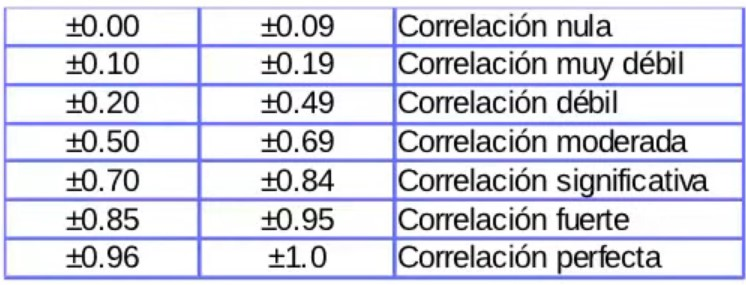

In [17]:
# Mostramos la matriz de correlación

mc = df_e.corr()
mc

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
Tipo de actividad,1.000000,0.522826,0.546441,0.550016,-0.298062,0.130437,-0.629688,0.620275,0.586183,0.605369,-0.552626,-0.134624,0.219058,-0.130563,0.353564
Distancia,0.522826,1.000000,0.794354,0.946129,-0.346051,0.207083,-0.620448,0.586046,0.836926,0.840392,-0.387288,-0.207058,0.351203,0.128870,0.627044
Calorías,0.546441,0.794354,1.000000,0.797601,-0.257811,0.222588,-0.609119,0.614462,0.782958,0.784242,-0.477664,-0.138042,0.285552,0.177073,0.633201
Tiempo,0.550016,0.946129,0.797601,1.000000,-0.506501,0.063542,-0.778296,0.771971,0.941476,0.937096,-0.501236,-0.191506,0.351736,0.289738,0.771955
Frecuencia cardiaca media,-0.298062,-0.346051,-0.257811,-0.506501,1.000000,0.716014,0.673228,-0.684323,-0.499166,-0.510319,0.421013,0.122248,-0.080307,-0.307718,-0.515587
TE aeróbico,0.130437,0.207083,0.222588,0.063542,0.716014,1.000000,0.150979,-0.165023,0.041822,0.035719,0.059974,0.029486,0.180737,-0.203248,-0.104267
Cadencia de carrera media,-0.629688,-0.620448,-0.609119,-0.778296,0.673228,0.150979,1.000000,-0.935527,-0.826600,-0.823853,0.526614,0.125708,-0.259559,-0.316745,-0.708017
Ritmo medio,0.620275,0.586046,0.614462,0.771971,-0.684323,-0.165023,-0.935527,1.000000,0.809733,0.805160,-0.752718,-0.090790,0.245303,0.331549,0.705033
Ascenso total,0.586183,0.836926,0.782958,0.941476,-0.499166,0.041822,-0.826600,0.809733,1.000000,0.992813,-0.521559,-0.233077,0.270696,0.394606,0.856773
Descenso total,0.605369,0.840392,0.784242,0.937096,-0.510319,0.035719,-0.823853,0.805160,0.992813,1.000000,-0.523020,-0.244543,0.262130,0.373444,0.852101


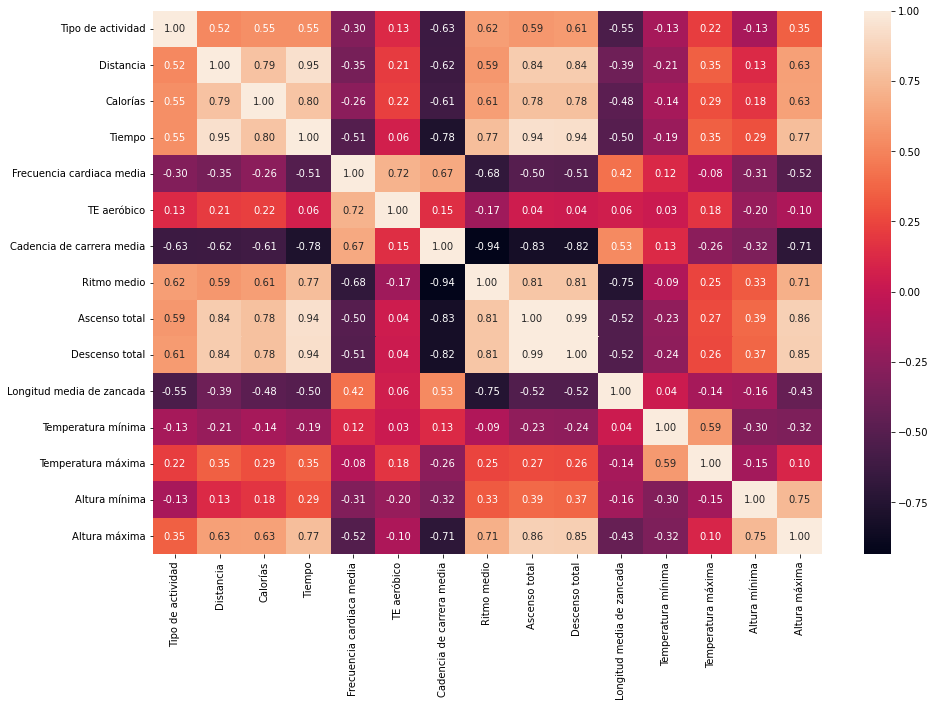

In [18]:
# Mostramos la matriz de correlación
# como un mapa de calor 

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(mc, annot=True, fmt=".2f")
plt.show()

### Histograma y Densidad:

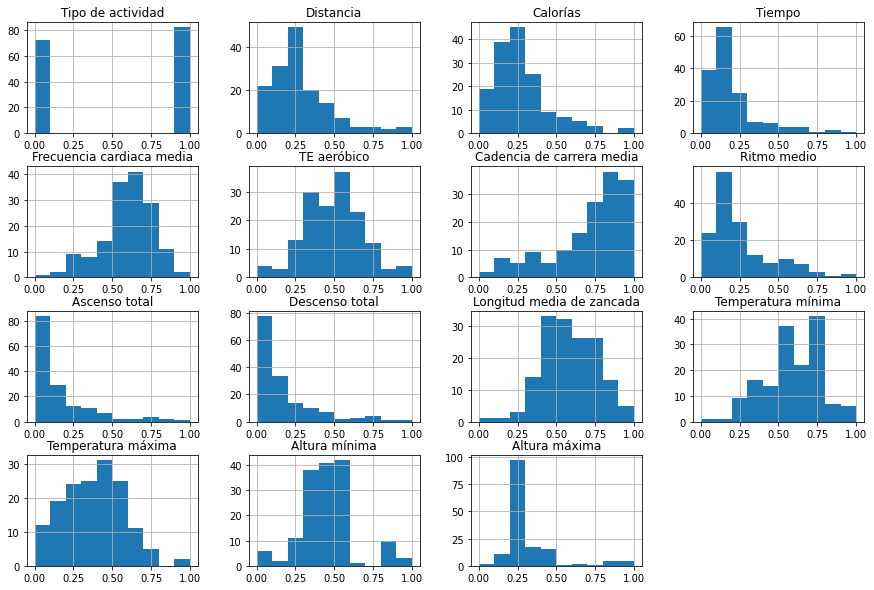

In [19]:
# Mostramos los histogramas

df_e.hist(figsize=(15,10))
plt.show()

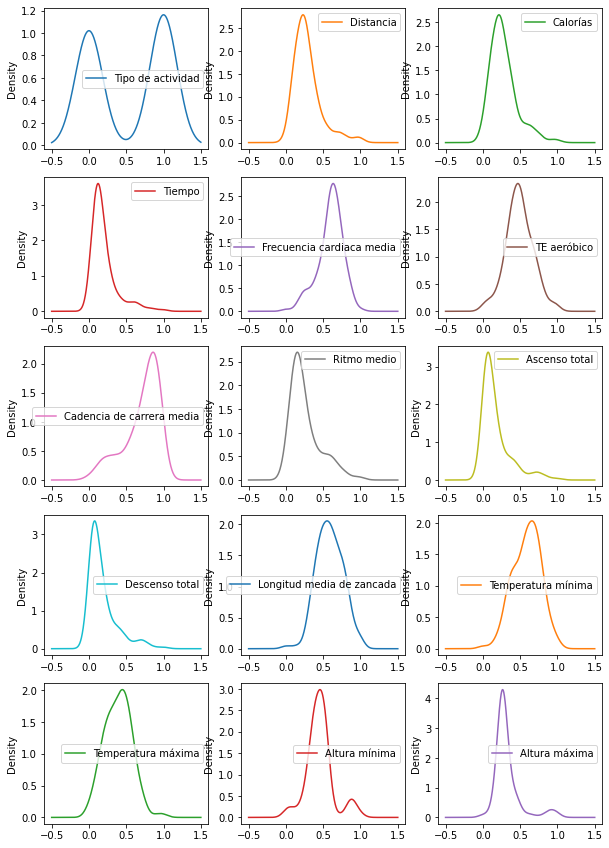

In [20]:
# Mostramos las gráficas de densidad

df_e.plot(kind='density', subplots=True, layout=(5,3), figsize=(10,15), sharex=False)
plt.show()

### Pairplot:

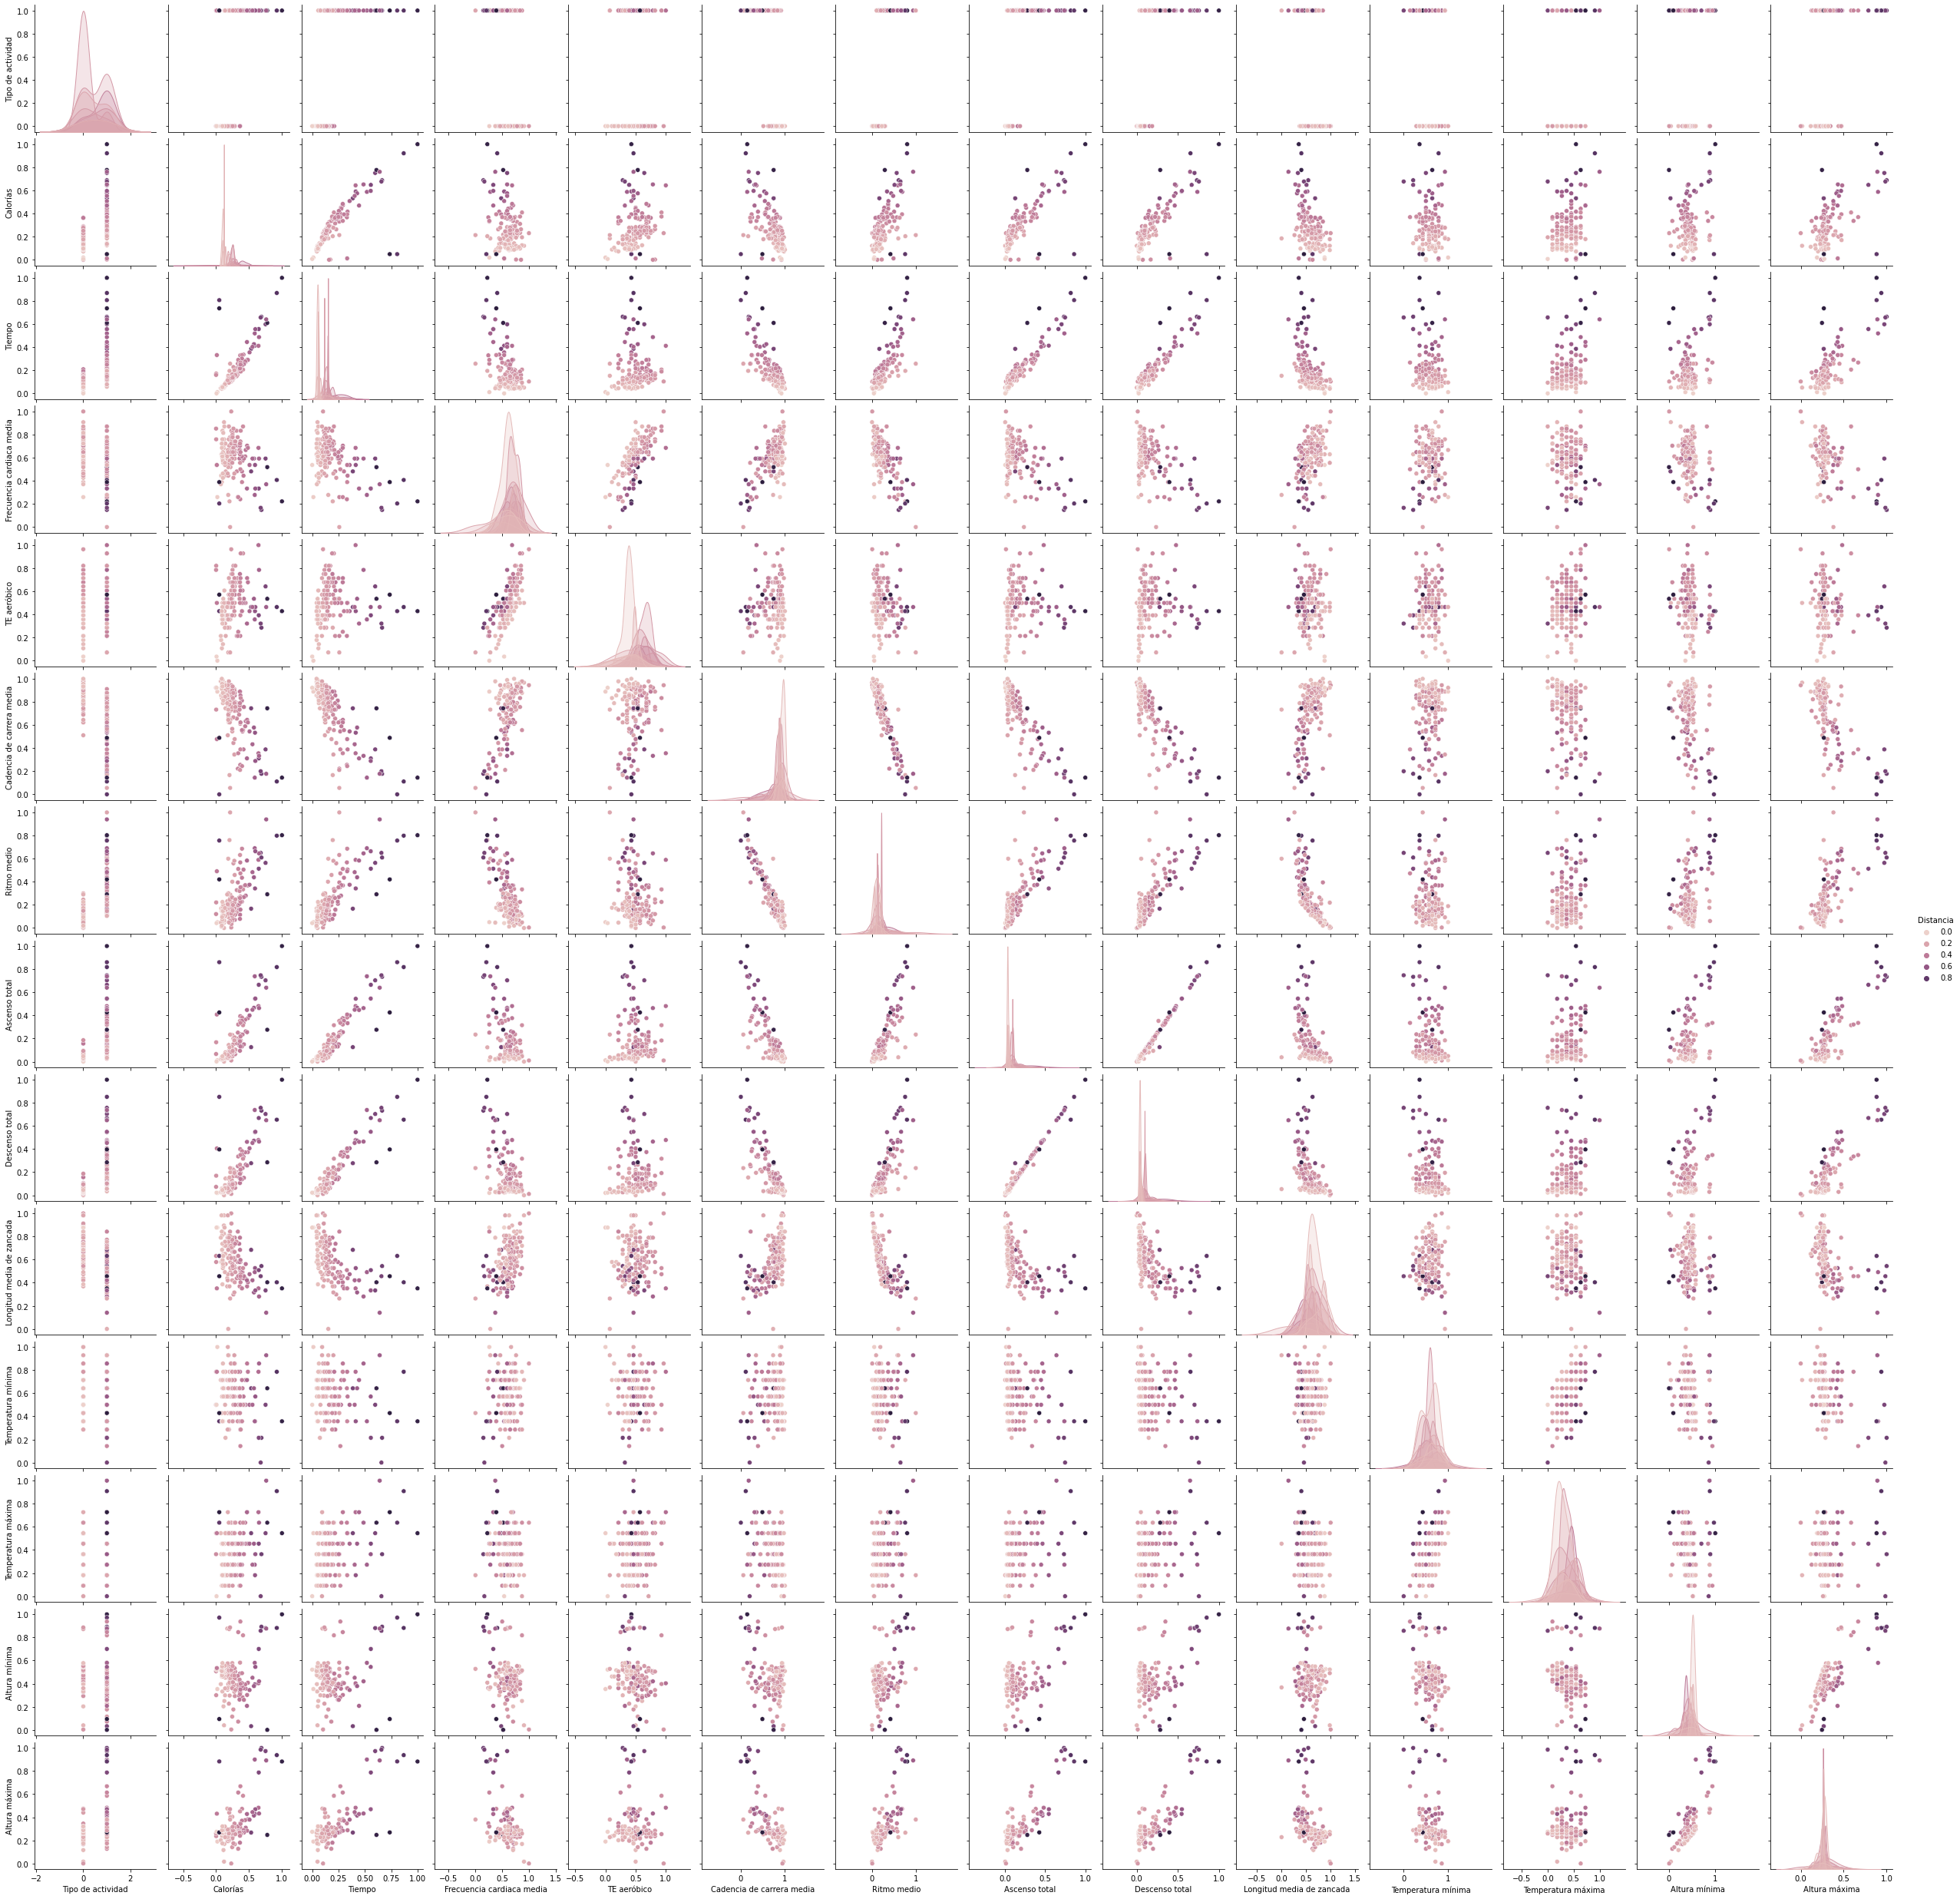

In [21]:
# Mostramos el diagrama de pares (pairplot)

sns.pairplot(df_e, hue='Distancia')

### Conclusiones:

> En este caso, se puede observar que las columnas correspondientes a la `Temperatura mínima` y `Temperatura máxima` pueden combinarse mediante la obtención de la media de ambas, de igual manera que se pueden hacer con las columnas de `Altura`. Además, después de varias pruebas, comprobamos que las columnas `Ascenso total` y `Descenso total` no proporcionan información útil para el **modelo de regresión** para la **predicción de Calorías**, por lo que las eliminamos, ya que afectan negativamente al rendimiento de este.

In [22]:
# df_e['Posición'] = (df_e['Ascenso total'] + df_e['Descenso total']) / 2
df_e['Temperatura'] = (df_e['Temperatura mínima'] + df_e['Temperatura máxima']) / 2
df_e['Altura'] = (df_e['Altura mínima'] + df_e['Altura máxima']) / 2

In [23]:
# df_e = df_e.drop('Cadencia de carrera media', axis=1)
# df_e = df_e.drop('Longitud media de zancada', axis=1)

df_e = df_e.drop('Ascenso total', axis=1)
df_e = df_e.drop('Descenso total', axis=1)
df_e = df_e.drop('Temperatura mínima', axis=1)
df_e = df_e.drop('Temperatura máxima', axis=1)
df_e = df_e.drop('Altura mínima', axis=1)
df_e = df_e.drop('Altura máxima', axis=1)

In [24]:
# Dataframe final a utilizar

df_e

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Longitud media de zancada,Temperatura,Altura
0,1.0,0.604231,0.591099,0.413185,0.537037,0.428571,0.533333,0.342052,0.526316,0.269481,0.411850
1,0.0,0.205089,0.198540,0.104351,0.703704,0.464286,0.844444,0.112676,0.701754,0.396104,0.383903
2,1.0,0.286327,0.327538,0.163650,0.777778,0.714286,0.788889,0.189135,0.578947,0.360390,0.334546
3,1.0,0.191600,0.246175,0.149630,0.574074,0.392857,0.544444,0.400402,0.421053,0.350649,0.491074
4,1.0,0.316064,0.314673,0.217776,0.481481,0.214286,0.655556,0.327968,0.438596,0.305195,0.354336
...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,0.099326,0.109527,0.051495,0.814815,0.535714,0.955556,0.108652,0.631579,0.412338,0.419311
150,0.0,0.138872,0.133866,0.080169,0.555556,0.285714,0.944444,0.173038,0.491228,0.259740,0.437628
151,0.0,0.099326,0.091099,0.049771,0.611111,0.392857,0.955556,0.094567,0.684211,0.269481,0.418518
152,0.0,0.252606,0.251391,0.135928,0.777778,0.642857,0.933333,0.148893,0.543860,0.224026,0.434728


In [25]:
df_e.describe()

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Longitud media de zancada,Temperatura,Altura
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.532468,0.288858,0.277636,0.198884,0.596441,0.490955,0.710101,0.259897,0.588289,0.489691,0.388278
std,0.500573,0.184771,0.180502,0.173995,0.167955,0.181492,0.237433,0.203775,0.175612,0.163609,0.164581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001596
25%,0.000000,0.172977,0.169245,0.099927,0.537037,0.392857,0.613889,0.120724,0.460526,0.371753,0.311580
50%,1.000000,0.252606,0.244089,0.143528,0.620370,0.500000,0.788889,0.196177,0.578947,0.503247,0.369985
75%,1.000000,0.346413,0.362656,0.238930,0.703704,0.607143,0.888889,0.341046,0.719298,0.594156,0.398908
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.964286,0.946277


##  5. Realizar las pruebas oportunas para elegir aquel modelo que consideres adecuado en la resolución del problema. Recoger en la memoria los parámetros utilizados y el criterio de calidad (por ejemplo la precisión, MAE, etc…) que has decido utilizar para escoger un modelo. **Es fundamental/obligado el aplicar la técnica de la validación cruzada (Cross validation)**.

## Recuerda que para KNN hay que realizar una prueba con múltiples números de vecinos y el weight a utilizar, para dterminar los parámetros que ofrecen un mejor resultado.

### Modelos de NaiveBayes - **Clasificación**

In [26]:
# Separamos datos de entrada y salida

x_df = df.drop('Calorías', axis=1)
y_df = df['Calorías']

# Separamos train y test

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)

#### Sin CrossValidation

In [27]:
# Modelos NaiveBayes
names = ['GaussianNB', 'MultiNomialNB', 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

for name, clf in zip(names, classifiers):
  
  # Entrena el modelo
  clf.fit(x_train, y_train)

  # Predice y puntua
  # Devuelve la precisión media de las etiquetas y los datos de prueba proporcionados
  score = clf.score(x_test, y_test)
  print ("Modelo: %s = %.2f" % (name, score))

Modelo: GaussianNB = 0.00
Modelo: MultiNomialNB = 0.00
Modelo: BernouilliNB = 0.00
Modelo: ComplementNB = 0.00


#### Con CrossValidation

In [28]:
cv = KFold(n_splits = 5, shuffle = True) 
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(x_train):

    # División train test aleatoria
    # Extrae la información (iloc), 
    # atendiendo a los indices obtenidos por CrossValidation
    f_train_x = x_train.iloc[train_fold]
    f_train_y = y_train.iloc[train_fold]

    # Entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)

    # Realizamos la predicción (Final evaluation) 
    # y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(x_train.iloc[test_fold])

    # Evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)

  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %.2f" % (names[i], total_scores[i]))

Modelo: GaussianNB = 0.00
Modelo: MultiNomialNB = 0.00
Modelo: BernouilliNB = 0.00
Modelo: ComplementNB = 0.00


### **Modelos de Regresión**

In [29]:
# Separamos datos de entrada y salida

x_df = df_e.drop('Calorías', axis=1)
y_df = df_e['Calorías']

# Obtenemos el mejor random state entre 10 números aleatorios
# Utilizando el modelo de Regresión Linear de scikit-learn

mse_scores = []
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=0)

for r in range(0, 31):
    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=r)
    model = KNeighborsRegressor(n_neighbors=1).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Encontrar el valor de random state con el MSE más bajo
mejor = np.argmin(mse_scores)
print("random_state: ", mejor)

# Separamos train y test

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=mejor)

random_state:  2


#### Modelo LinearRegression - **Regresión**

##### Sin CrossValidation

In [30]:
# Instanciamos el modelo LinearRegression
lr = LinearRegression()

# Entrenamiento y ejeución del modelo
lr.fit(x_train, y_train)

# Evaluación del modelo
y_pred = lr.predict(x_test)

# Calcular la precisión del modelo
accuracy = lr.score(x_test, y_test)
print("Modelo: %s = %.2f" % ("LinearRegression", accuracy))

Modelo: LinearRegression = 0.91


##### Con CrossValidation

In [31]:
# Instanciamos modelo de clasificación KNN
lr = LinearRegression()

# Evaluación del modelo con Cross Validation
scores = cross_val_score(lr, x_train, y_train, cv=5)
print("Modelo: %s = %.2f" % ("LinearRegression", np.mean(scores)))
print("Scores:", scores)
print("Promedio:", np.mean(scores))
print("Desviación estándar:", np.std(scores))

Modelo: LinearRegression = 0.58
Scores: [0.02932495 0.79895456 0.85015146 0.50945422 0.70362279]
Promedio: 0.5783015948942152
Desviación estándar: 0.29813111311536633


#### Modelo KNN (K-Nearest neighbors) - **Regresión**

Min Value uniform : 0.040199201399793626 (2)
Min Value distance : 0.03978481968178291 (2)


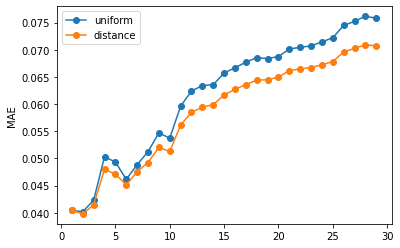

In [32]:
# Creación del objeto TimeSeriesSplit
cv = TimeSeriesSplit(n_splits = 2)

# Reinicio del índice
x_train.reset_index(drop = True, inplace = True) 

# Iteración sobre los diferentes pesos
for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []

  # Iteración sobre el número de vecinos cercanos 
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = KNeighborsRegressor(n_neighbors, weights=weights)

       # Verificar cada uno de los modelos con validación cruzada
       for train_fold, test_fold in cv.split(x_train):

          # División train test aleatoria
          f_train = x_train.loc[train_fold]
          f_test = x_train.loc[test_fold]

          # Entrenamiento y ejecución del modelo
          knn.fit(x_train,y_train)
          y_pred_cv = knn.predict(x_test)

          # evaluación del modelo
          mae = mean_absolute_error(y_test, y_pred_cv)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   # Graficación de la puntuación MAE
   plt.plot(range(1,len(total_scores)+1), total_scores, marker='o', label=weights)
   print('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')     

plt.legend()
plt.show()

In [33]:
# Parámetros
k = 2 # k-neighbors o vecinos
w = "distance" # Devuelve mayor precisión

##### Sin CrossValidation

In [34]:
# Instanciamos el modelo KNN
knn = KNeighborsRegressor(n_neighbors=k, weights=w)

# Entrenamiento y ejeución del modelo
knn.fit(x_train, y_train)

# Evaluación del modelo
y_pred = knn.predict(x_test)

# Calcular la precisión del modelo
accuracy = knn.score(x_test, y_test)
print("Modelo: %s = %.2f" % ("KNN", accuracy))

Modelo: KNN = 0.88


##### Con CrossValidation

In [35]:
# Instanciamos modelo de clasificación KNN
knn = KNeighborsRegressor(n_neighbors=k*3, weights=w)

# Evaluación del modelo con Cross Validation
scores = cross_val_score(knn, x_train, y_train)
print("Modelo: %s = %.2f" % ("KNN", np.mean(scores)))
print("Scores:", scores)
print("Promedio:", np.mean(scores))
print("Desviación estándar:", np.std(scores))

Modelo: KNN = 0.58
Scores: [0.32469364 0.64320277 0.66933885 0.51988617 0.72699212]
Promedio: 0.5768227084447148
Desviación estándar: 0.1430574975556866


> Un valor más alto para n_neighbors hará que el modelo sea menos sensible a los ruidos de los datos, pero también puede causar un aumento en el sesgo. Un valor más bajo hará que el modelo sea más sensible a los ruidos de los datos, pero también puede causar un aumento en la varianza. Por lo tanto, es importante encontrar un equilibrio adecuado entre estos dos factores al seleccionar el valor de n_neighbors.

> Después de evaluar varios algoritmos de clasificación, llegamos a la conclusión de que el modelo **KNeighborsRegressor() con CrossValidation** es el que ofrece el mejor rendimiento para el problema de regresión de rendimiento deportivo.

## 6. Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:

### Entrenarlo y obtener la matriz de confusión

In [36]:
# Instanciamos el modelo

model = KNeighborsRegressor(n_neighbors=k, weights=w)

# Cross Validation
y_pred = cross_val_score(model, x_train, y_train, cv=5)

# Entrenamiento y ejeución del modelo
model.fit(x_train, y_train)

# Evaluación del modelo
y_model = model.predict(x_test)

In [37]:
# Predicción con nuevos datos

y_model

array([0.31988634, 0.29569067, 0.33154032, 0.15527258, 0.26245476,
       0.25300964, 0.42284936, 0.37628731, 0.24687623, 0.17595168,
       0.38919762, 0.23957899, 0.10666364, 0.26261074, 0.07913281,
       0.08891728, 0.22149297, 0.11937853, 0.29102641, 0.11942936,
       0.21538791, 0.37068205, 0.18533358, 0.24495702, 0.21044654,
       0.63231538, 0.19115277, 0.21451825, 0.1162006 , 0.31213114,
       0.29761813])

In [38]:
# Precisión del modelo importado sin CrossValidation

accuracy = model.score(x_test, y_test)
print("Modelo: %s = %.2f" % ('KNeighborsRegressor', accuracy))

Modelo: KNeighborsRegressor = 0.88


In [39]:
# Precisión del modelo importado con CrossValidation

y_pred = cross_val_score(model, x_train, y_train, cv=5)
print("Modelo: %s = %.2f" % ('KNeighborsRegressor', y_pred.mean()))

Modelo: KNeighborsRegressor = 0.52


#### Métricas de error:

In [40]:
# Mean Absolute Error (MAE)

mae = mean_absolute_error(y_model, y_test)
print("MAE:", mae)

MAE: 0.03978481968178291


In [41]:
# Mean Squared Error (MSE)

mse = mean_squared_error(y_model, y_test)
print("MSE:", mse)

MSE: 0.0024214350952618106


In [42]:
# Mean Absolute Percentage Error (MAPE)

mape = mean_absolute_percentage_error(y_model, y_test)
print("MAPE:", mape)

MAPE: 0.17794743510583638


In [43]:
# R2 Score

r2 = r2_score(y_model, y_test)
print("R2 Score:", r2)

R2 Score: 0.8134884747783138


### Exportar a un fichero los parámetros del modelo entrenado

In [44]:
# Exportamos el modelo

joblib.dump(model,'activities.pkl')

['activities.pkl']

### Importar los parámetros del modelo

In [45]:
# Importamos el modelo

import_model = joblib.load('activities.pkl')

In [46]:
# Precisión del modelo importado sin CrossValidation

accuracy = import_model.score(x_test, y_test)
print("Modelo: %s = %.2f" % ('activities.pkl', accuracy))

Modelo: activities.pkl = 0.88


In [47]:
# Precisión del modelo importado con CrossValidation

y_pred_import = cross_val_score(import_model, x_train, y_train, cv=5)
print("Modelo: %s = %.2f" % ('activities.pkl', y_pred_import.mean()))

Modelo: activities.pkl = 0.52


### Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión

In [48]:
# Realizamos la predicción

y_model_import = import_model.predict(x_test)

In [49]:
# Mean Squared Error (MSE)

mse = mean_squared_error(y_model, y_test)
print("MSE:", mse)

MSE: 0.0024214350952618106


In [50]:
# Mean Absolute Percentage Error (MAPE)

mape = mean_absolute_percentage_error(y_model, y_test)
print("MAPE:", mape)

MAPE: 0.17794743510583638


In [51]:
# R2 Score

r2 = r2_score(y_model, y_test)
print("R2 Score:", r2)

R2 Score: 0.8134884747783138
